In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [82]:
df = pd.read_csv('input/train.csv')

In [83]:
df['moving_ave'] = df['count'].rolling(window=7, center=True).mean()
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = pd.to_datetime(df['datetime']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['datetime']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['datetime']).dt.strftime('%d')
df['weekday'] = pd.to_datetime(df['datetime']).dt.strftime('%a')
df['hour'] = pd.to_datetime(df['datetime']).dt.strftime('%H')
df.dropna(inplace=True)
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'moving_ave', 'year', 'month', 'day', 'weekday', 'hour'],
      dtype='object')

In [84]:
df = df[
    [
        'temp',    
        # 'humidity',
        # 'windspeed',
        # 'holiday',
        # 'workingday',
        # 'weather',
        # 'month',
        # 'weekday',
        'hour',
        'count',
        'moving_ave',
    ]
]

In [85]:
df = pd.get_dummies(df, columns=[
    # 'month',
    # 'weekday',
    'hour',
    # 'weather',
])

In [86]:
y = df.loc[:,["count"]].values
df.drop(['count'], axis=1, inplace=True)
X = df.values

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train = y_train.ravel()   # 1    2d array -> 1d array 
y_test  = y_test.ravel()    # 2    2d array -> 1d array 

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# import lightgbm as lgb
# model = lgb.LGBMRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [89]:
# スコアを表示。小さいほどよい
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [90]:
# from sklearn.linear_model import Lasso                         # LASSO回帰のクラスを読み込み
# model = Lasso(alpha=1)                                # LASSO回帰のインスタンスを生成
# model = model_lasso.fit(X_train, y_train)                                      # データを学習させる
# y_pred = model.predict(X_test)

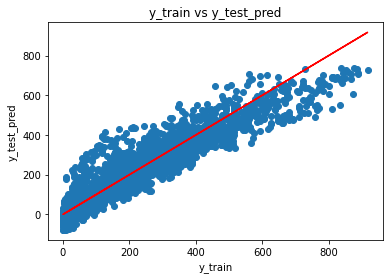

In [91]:
# 散布図を描画(真値 vs 予測値)
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred) # 散布図のプロット
plt.xlabel('y_train') # x軸ラベル
plt.ylabel('y_test_pred') # y軸ラベル
plt.title('y_train vs y_test_pred') # グラフタイトル
plt.show()

In [92]:
print("test score: ",rmsle(y_test, model.predict(X_test)))
print("train score: ",rmsle(y_train, model.predict(X_train)))

test score:  0.5528335206163139
train score:  0.5373906330110448


In [93]:
y_t = pd.DataFrame(model.predict(X_train))
y_t.describe()

,0
count,7616.000000
mean,189.231224
std,169.740278
min,-81.013726
25%,43.455303
50%,157.634796
75%,298.809072
max,802.548960


In [94]:
y_p = pd.DataFrame(model.predict(X_test))
y_p.describe()

,0
count,3264.000000
mean,196.958914
std,170.363437
min,-78.338145
25%,48.487021
50%,164.699955
75%,310.221667
max,736.422912


In [95]:
y_p

,0
0,37.668344
1,483.635014
2,17.573285
3,299.253464
4,124.093191
...,...
3259,303.061560
3260,-56.682616
3261,-16.026431
3262,127.533530


In [96]:
y_p.loc[y_p[0]<0].count()

0    218
dtype: int64